In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### 3rd party domains that submitted the most cookies

In [23]:
dbConn = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConn.cursor()

dbCursor.execute('SELECT domain, COUNT(*) FROM cookie_counts GROUP BY domain ORDER BY COUNT(*) DESC')
sortedRecords = dbCursor.fetchall()

print("Count\tThird party domain")
print("------------------------------------")
for domain, count in sortedRecords:
    print(f"{count}\t{domain}")

dbConn.close()

Count	Third party domain
------------------------------------
326	adnxs.com
274	rubiconproject.com
205	taboola.com
205	casalemedia.com
195	xplosion.de
87	amazon-adsystem.com
84	omnitagjs.com
80	cxense.com
75	yieldlab.net
74	pinterest.com
70	rfihub.com
68	yahoo.com
54	openx.net
54	demdex.net
48	creativecdn.com
47	seedtag.com
45	ads.stickyadstv.com
40	prod.svc.y6b.de
35	zeotap.com
35	tiktok.com
34	zalando.com
34	eyeota.net
33	twitter.com
30	t.co
28	youtube.com
27	the-ozone-project.com
27	contextweb.com
26	bidr.io
26	analytics.yahoo.com
24	everesttech.net
24	d.adup-tech.com
24	bild.de
22	dpm.demdex.net
22	ct.pinterest.com
19	tccd.douglas.de
19	cquotient.com
18	semasio.net
18	rezync.com
18	linkedin.com
17	zemanta.com
17	lijit.com
16	tapad.com
16	outbrain.com
16	3lift.com
16	360yield.com
15	www.sephora.de
15	tagger.opecloud.com
15	sxp.smartclip.net
14	turn.com
14	df-srv.de
14	commander1.com
14	aniview.com
14	agkn.com
13	w55c.net
13	connectad.io
11	tremorhub.com
11	account.samsung.com
9	tead

**Visualization**

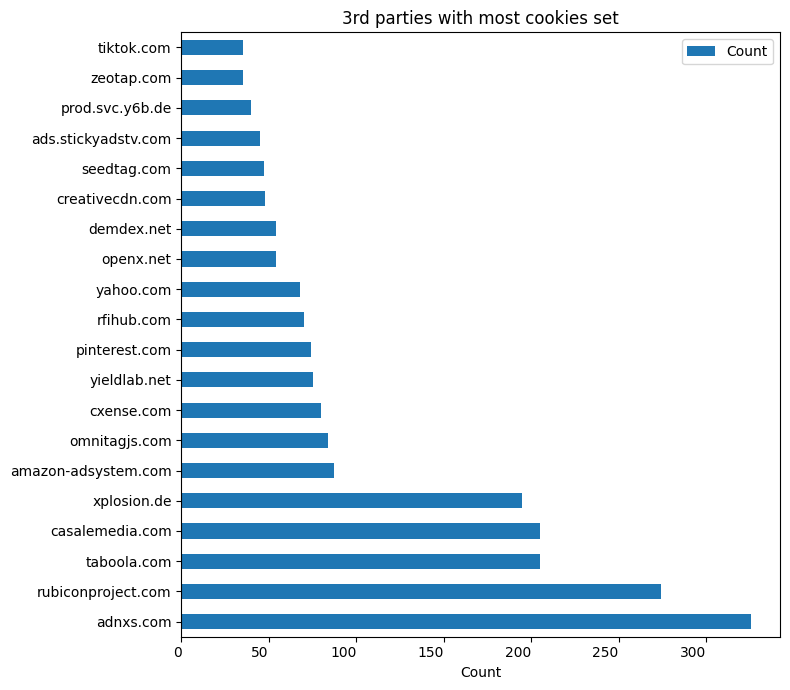

In [24]:
df = pd.DataFrame(sortedRecords, columns=['Domain', 'Count'])

df_top20 = df.head(20)

df_top20.plot(kind='barh', x='Domain', y='Count', figsize=(8, 7))

plt.title('3rd parties with most cookies set')
plt.xlabel('Count')
plt.ylabel('')

plt.xticks( fontsize='medium', ha='right')

plt.tight_layout()
plt.show()

## Comparison

### Shops vs News

**Websites that set the most cookies**

In [25]:
dbConn = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConn.cursor()

dbCursor.execute('SELECT host, COUNT(*), device_type, website_type FROM cookie_counts GROUP BY host ORDER BY COUNT(*) DESC')
sortedRecords1 = dbCursor.fetchall()

dbConn.close()

**Visualization**

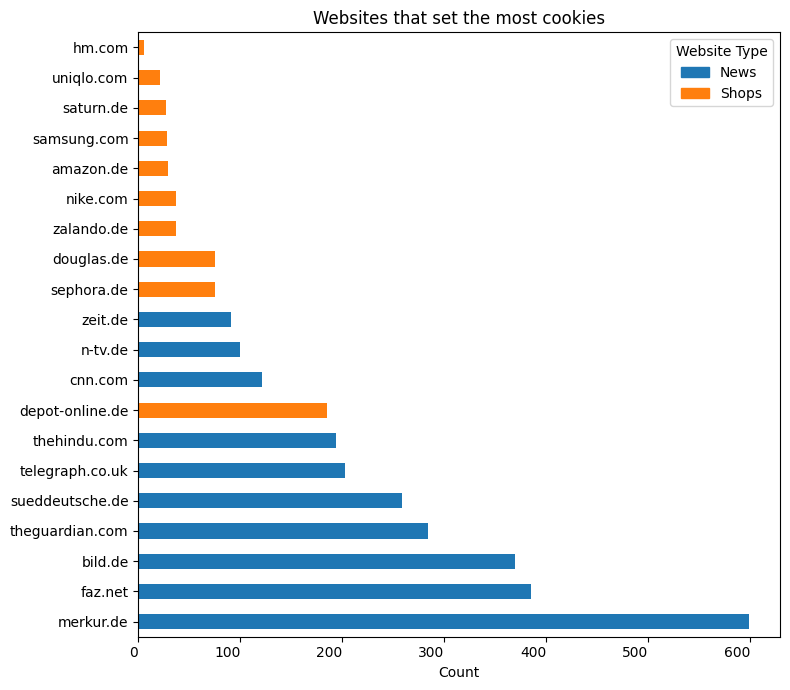

In [26]:
df = pd.DataFrame(sortedRecords1, columns=['Host', 'Count', 'Device Type', 'Website Type'])

df_top20 = df.head(20)

colors = ['#1f77b4' if website_type == 'news' else '#ff7f0e' for website_type in df_top20['Website Type']]

df_top20.plot(kind='barh', x='Host', y='Count', color=colors, figsize=(8, 7))

news_patch = mpatches.Patch(color='#1f77b4', label='News')
other_patch = mpatches.Patch(color='#ff7f0e', label='Shops')

plt.legend(title='Website Type', handles=[news_patch, other_patch])
plt.title('Websites that set the most cookies')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(fontsize='medium', ha='right')
plt.tight_layout()
plt.show()

**Total Amount of cookies for each website type**

In [27]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT website_type, COUNT(*) FROM cookie_counts GROUP BY website_type ORDER BY COUNT(*) DESC'

cursor.execute(query)

data4 = cursor.fetchall()

print("Count\twebsite type")
print("----------------------------")
for domain, count in data4:
    print(f"{count}\t{domain}")

conn.close()

Count	website type
----------------------------
2604	news
520	shops


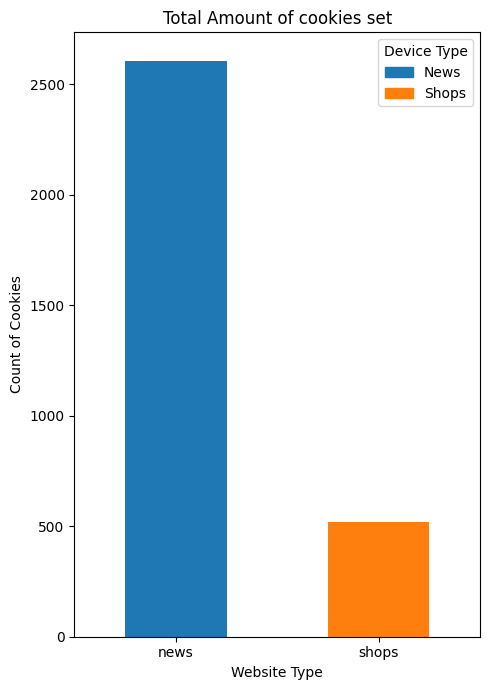

In [28]:
df = pd.DataFrame(data4, columns=['Website Type', 'Count'])

colors = ['#1f77b4' if website_type == 'news' else '#ff7f0e' for website_type in df['Website Type']]
df.plot(kind='bar', x='Website Type', y='Count', color=colors, figsize=(5, 7))

news_patch = mpatches.Patch(color='#1f77b4', label='News')
other_patch = mpatches.Patch(color='#ff7f0e', label='Shops')

plt.legend(handles=[news_patch, other_patch], title='Device Type')
plt.title('Total Amount of cookies set')
plt.ylabel('Count of Cookies')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Mobile vs Desktop

In [30]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT device_type, COUNT(*) FROM cookie_counts GROUP BY device_type ORDER BY COUNT(*) DESC'

cursor.execute(query)

data5 = cursor.fetchall()

print("Count\tdevice type")
print("----------------------------")
for domain, count in data4:
    print(f"{count}\t{domain}")

conn.close()

Count	device type
----------------------------
2604	news
520	shops


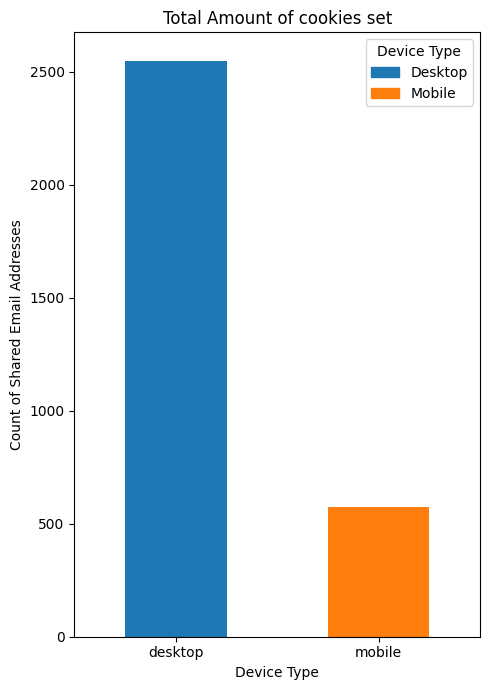

In [31]:
df = pd.DataFrame(data5, columns=['Device Type', 'Count'])

colors = ['#1f77b4' if website_type == 'desktop' else '#ff7f0e' for website_type in df['Device Type']]
df.plot(kind='bar', x='Device Type', y='Count', color=colors, figsize=(5, 7))

news_patch = mpatches.Patch(color='#1f77b4', label='Desktop')
other_patch = mpatches.Patch(color='#ff7f0e', label='Mobile')

plt.legend(handles=[news_patch, other_patch], title='Device Type')
plt.title('Total Amount of cookies set')
plt.ylabel('Count of Shared Email Addresses')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()